In [1]:
import pickle
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

import faiss
import random

c:\Users\sandy\Documents\T\CSE576\Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("column_embeddings_db.pkl", 'rb') as f:
    column_embeddings_db = pickle.load(f)

with open("table_embeddings_db.pkl", 'rb') as f:
    table_embeddings_db = pickle.load(f)

In [3]:
X_table = np.array(list(table_embeddings_db.values()))
X_column = np.array(list(column_embeddings_db.values()))

In [4]:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_table_2d = umap_model.fit_transform(X_table)
X_column_2d = umap_model.fit_transform(X_column)

c:\Users\sandy\Documents\T\CSE576\Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\sandy\Documents\T\CSE576\Project\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\sandy\Documents\T\CSE576\Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


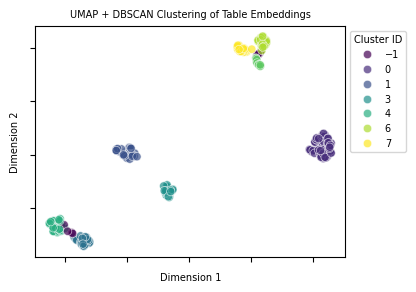

In [5]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(X_table_2d)
labels = dbscan.labels_  # -1 means noise, other numbers are cluster labels

plt.figure(figsize=(4, 3))
sns.scatterplot(x=X_table_2d[:, 0], y=X_table_2d[:, 1], hue=labels, palette="viridis", alpha=0.7)
plt.title("UMAP + DBSCAN Clustering of Table Embeddings", fontsize=7)
plt.xlabel("Dimension 1", fontsize=7)
plt.ylabel("Dimension 2", fontsize=7)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.legend(title="Cluster ID", bbox_to_anchor=(1, 1), loc='upper left', fontsize=7, title_fontsize=7)
plt.show()

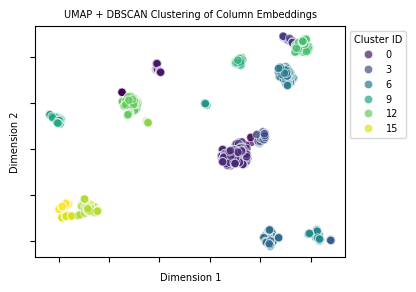

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(X_column_2d)
labels = dbscan.labels_  # -1 means noise, other numbers are cluster labels

plt.figure(figsize=(4, 3))
sns.scatterplot(x=X_column_2d[:, 0], y=X_column_2d[:, 1], hue=labels, palette="viridis", alpha=0.7)
plt.title("UMAP + DBSCAN Clustering of Column Embeddings", fontsize=7)
plt.xlabel("Dimension 1", fontsize=7)
plt.ylabel("Dimension 2", fontsize=7)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.legend(title="Cluster ID", bbox_to_anchor=(1, 1), loc='upper left', fontsize=7, title_fontsize=7)
plt.show()

In [7]:
dimension = len(list(table_embeddings_db.values())[0])
table_index = faiss.IndexIDMap(faiss.IndexFlatL2(dimension))

table_keys = list(table_embeddings_db.keys())
ids = np.arange(len(table_keys))
table_vectors = np.array(list(table_embeddings_db.values()))
table_index.add_with_ids(table_vectors, ids)

In [33]:
ids = [random.randint(0, len(column_embeddings_db)-1) for _ in range(5)]
mapped_col_names = list(column_embeddings_db.keys())
mapped_col_vectors = list(column_embeddings_db.values())
n = 5

for id in ids:
    mapped_col_name = mapped_col_names[id]
    mapped_col_vector = np.array(mapped_col_vectors[id]).reshape(1, -1)
    schema, table, col, embedding_type = mapped_col_name.split('_')
    print(f"Search Key")
    print(f"Schema Name: {schema}, Table Name: {table}, Column Name: {col}, Embedding Type: {embedding_type}\n")
    distances, indices = table_index.search(mapped_col_vector, n)
    
    print(f"Top {n} Matches")
    print(f"{'Schema Name':<20}{'Table Name':<40}{'Distance':<10}")
    print("-" * 80)
    for idx, distance in zip(indices[0], distances[0]):
        schema_name = table_keys[idx].split('_')[0]
        table_name = table_keys[idx].split('_')[1]
        print(f"{schema_name:<20}{table_name:<40}{distance:<10.4f}")
    print("\n")

Search Key
Schema Name: Purchasing, Table Name: PurchaseOrderHeader, Column Name: VendorID, Embedding Type: 01

Top 5 Matches
Schema Name         Table Name                              Distance  
--------------------------------------------------------------------------------
Purchasing          PurchaseOrderHeader                     7.9814    
Sales               SalesOrderHeader                        11.1403   
Sales               SalesTaxRate                            11.9966   
Sales               SpecialOffer                            12.3332   
Sales               SpecialOfferProduct                     12.8340   


Search Key
Schema Name: Person, Table Name: Person, Column Name: BusinessEntityID, Embedding Type: 03

Top 5 Matches
Schema Name         Table Name                              Distance  
--------------------------------------------------------------------------------
Person              BusinessEntity                          10.6104   
Person              Addre

In [9]:
column_embeddings_db.keys()

dict_keys(['HumanResources_Department_DepartmentID_01', 'HumanResources_Department_DepartmentID_02', 'HumanResources_Department_DepartmentID_03', 'HumanResources_Department_Name_01', 'HumanResources_Department_Name_02', 'HumanResources_Department_Name_03', 'HumanResources_Department_GroupName_01', 'HumanResources_Department_GroupName_02', 'HumanResources_Department_GroupName_03', 'HumanResources_Department_ModifiedDate_01', 'HumanResources_Department_ModifiedDate_02', 'HumanResources_Department_ModifiedDate_03', 'HumanResources_Employee_BusinessEntityID_01', 'HumanResources_Employee_BusinessEntityID_02', 'HumanResources_Employee_BusinessEntityID_03', 'HumanResources_Employee_NationalIDNumber_01', 'HumanResources_Employee_NationalIDNumber_02', 'HumanResources_Employee_NationalIDNumber_03', 'HumanResources_Employee_LoginID_01', 'HumanResources_Employee_LoginID_02', 'HumanResources_Employee_LoginID_03', 'HumanResources_Employee_OrganizationLevel_01', 'HumanResources_Employee_OrganizationL